In [1]:
import math
import csv
from scipy.spatial.transform import Rotation as R
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import rosbag
from sensor_msgs.msg import Imu, NavSatFix
import scipy.io as sio
import numpy as np
from collections import OrderedDict

In [2]:
## 1.北京数据自带惯导轨迹
f = open("datas/odometry_loc_bj-or-ins.txt", encoding="utf-8")
line1 = 0

data_line = f.readline()
datas1 = []
while data_line:
    d = data_line.replace('\n', '').split("\t")
    datas1.append(d)
    data_line = f.readline()
    # print(data_line)
    line1 += 1

## 2.北京数据使用我们的惯导算法出的轨迹
f = open("datas/odometry_loc_bj-cg-ins.txt", encoding="utf-8")
line2 = 0

data_line = f.readline()
datas2 = []
while data_line:
    d = data_line.replace('\n', '').split("\t")
    datas2.append(d)
    data_line = f.readline()
    # print(data_line)
    line2 += 1

## 3.北京数据跑floam出的lidar_slam
f = open("datas/lidar_slam_pose_bj.txt", encoding="utf-8")
line3 = 0

data_line = f.readline()
datas3 = []
while data_line:
    d = data_line.replace('\n', '').split("\t")
    datas3.append(d)
    data_line = f.readline()
    # print(data_line)
    line3 += 1

## 4.小车0712-52数据的惯导轨迹
f = open("datas/odometry_loc_52.txt", encoding="utf-8")
line4 = 0

data_line = f.readline()
datas4 = []
while data_line:
    d = data_line.replace('\n', '').split("\t")
    datas4.append(d)
    data_line = f.readline()
    line4 += 1

f = open("datas/lidar_slam_pose_52.txt", encoding="utf-8")
line5 = 0

data_line = f.readline()
datas5 = []
while data_line:
    d = data_line.replace('\n', '').split("\t")
    datas5.append(d)
    data_line = f.readline()
    # print(data_line)
    line5 += 1

x1 = []
y1 = []
for i in range(line1):
    x1.append(float(datas1[i][1]))
    y1.append(float(datas1[i][2]))

x2 = []
y2 = []
for i in range(line2):
    x2.append(float(datas2[i][1]))
    y2.append(float(datas2[i][2]))

x3 = []
y3 = []
for i in range(line3):
    x3.append(float(datas3[i][1]))
    y3.append(float(datas3[i][2]))

x4 = []
y4 = []
for i in range(line4):
    x4.append(float(datas4[i][1]))
    y4.append(float(datas4[i][2]))

x5 = []
y5 = []
for i in range(line5):
    x5.append(float(datas5[i][1]))
    y5.append(float(datas5[i][2]))

In [22]:
f = open("/home/crange/dev/calib_ws/calib_data/odometry.txt", encoding="utf-8")
temp_line = 0

data_line = f.readline()
temp_datas = []
while data_line:
    d = data_line.replace('\n', '').split()
    temp_datas.append(d)
    data_line = f.readline()
    temp_line += 1

In [23]:
temp_x = []
temp_y = []
for i in range(temp_line):
    temp_x.append(float(temp_datas[i][1]))
    temp_y.append(float(temp_datas[i][2]))

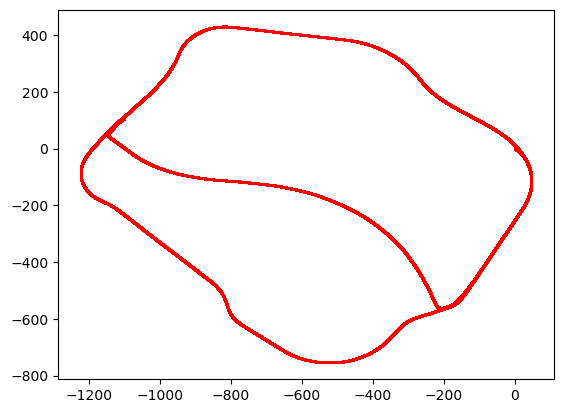

In [24]:
plt.scatter(temp_x, temp_y, 1, 'red')
plt.show()

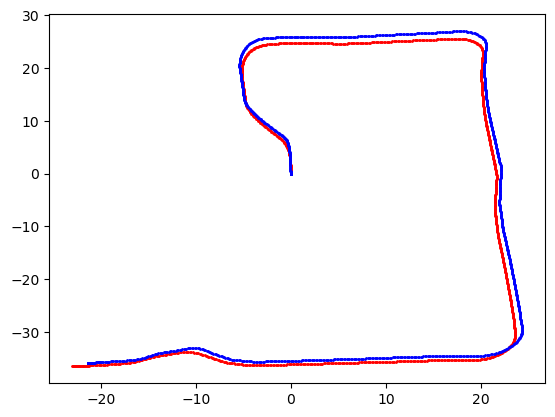

In [26]:
# axes = plt.axes()
# axes.get_xaxis().set_visible(False)
# axes.get_yaxis().set_visible(False)
plt.scatter(x1, y1, 1, 'red', label="BJ->INS")
plt.scatter(x2, y2, 1, 'blue', label="BJ_IMU_GPS&CG_Algo->INS")
# plt.scatter(x3, y3, 1, 'green', label="BJ->lidar_slam")
# plt.legend()
plt.show()

## 转欧拉角

In [3]:
## 1.北京数据自带惯导轨迹
euler1 = []
for i in range(line1):
    temp_q = [float(datas1[i][4]), float(datas1[i][5]), float(datas1[i][6]), float(datas1[i][7])]
    r = R.from_quat(temp_q)
    temp_euler = r.as_euler('xyz', degrees=True)
    euler1.append(temp_euler)

## 2.北京数据使用我们的惯导算法出的轨迹
euler2 = []
for i in range(line2):
    temp_q = [float(datas2[i][4]), float(datas2[i][5]), float(datas2[i][6]), float(datas2[i][7])]
    r = R.from_quat(temp_q)
    temp_euler = r.as_euler('xyz', degrees=True)
    euler2.append(temp_euler)

## 3.北京数据跑floam出的lidar_slam
euler3 = []
for i in range(line3):
    temp_q = [float(datas3[i][4]), float(datas3[i][5]), float(datas3[i][6]), float(datas3[i][7])]
    r = R.from_quat(temp_q)
    temp_euler = r.as_euler('xyz', degrees=True)
    euler3.append(temp_euler)

## 4.小车0712-52数据的惯导轨迹
euler4 = []
for i in range(line4):
    temp_q = [float(datas4[i][4]), float(datas4[i][5]), float(datas4[i][6]), float(datas4[i][7])]
    r = R.from_quat(temp_q)
    temp_euler = r.as_euler('xyz', degrees=True)
    euler4.append(temp_euler)

euler5 = []
for i in range(line5):
    temp_q = [float(datas5[i][4]), float(datas5[i][5]), float(datas5[i][6]), float(datas5[i][7])]
    r = R.from_quat(temp_q)
    temp_euler = r.as_euler('xyz', degrees=True)
    euler5.append(temp_euler)

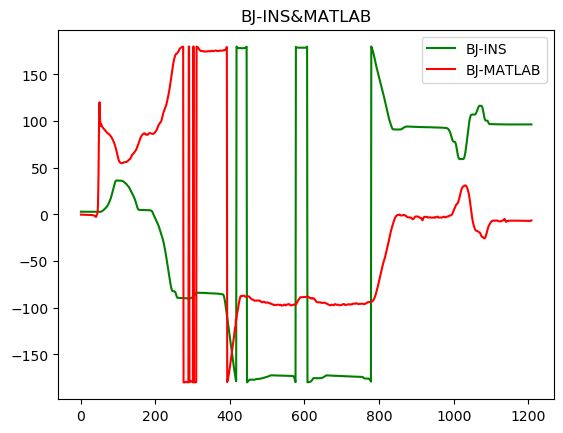

In [10]:
x = []
y1 = []
y2 = []
for i in range(min(len(euler1), len(euler2))):
    x.append(i + 1)
    y1.append(euler1[i][2])
    y2.append(euler2[i][2])
plt.title('BJ-INS&MATLAB')
plt.plot(x, y1, 1, color='green', label='BJ-INS')
plt.plot(x, y2, 1, color='red', label='BJ-MATLAB')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()



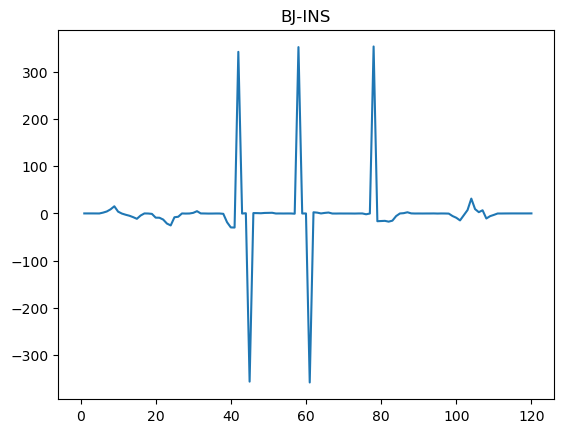

In [78]:
t = []
tx = []
index = 1
i = 0
while i < (len(euler1) - 10):
    t.append(euler1[i+10][2] - euler1[i][2])
    tx.append(index)
    index += 1
    i += 10

plt.title('BJ-INS')
plt.plot(tx, t, 1)
plt.show()

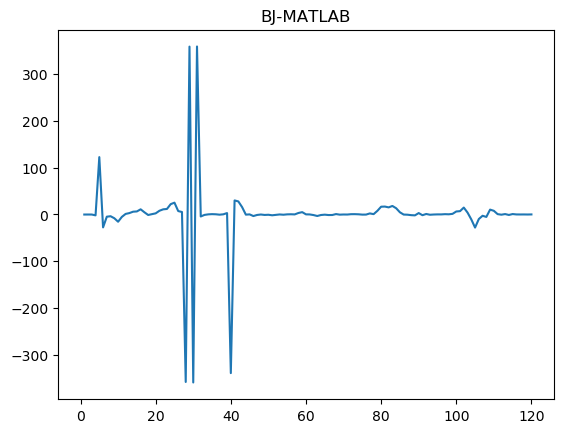

In [79]:
t = []
tx = []
index = 1
i = 0
while i < (len(euler2) - 10):
    t.append(euler2[i+10][2] - euler2[i][2])
    tx.append(index)
    index += 1
    i += 10

plt.title('BJ-MATLAB')
plt.plot(tx, t, 1)
plt.show()

## 1. 北京数据

### 1.1 北京惯导姿态欧拉角

In [ ]:
for i in range(len(euler1)):
    print(euler1[i][2])

2.951018497043459
2.9517680533772364
2.952414572609676
2.952893315298163
2.9529176195767066
2.951646328401216
2.9517739400185063
2.9526497507339036
2.952468883934703
2.954088366449731
2.9540876811097516
2.954481264021451
2.9545769856546866
2.9534909689650397
2.9525533765681304
2.954816782757781
2.9544706205099907
2.956314993660183
2.957495483963432
2.956885377466741
2.958357515535586
2.957776173412465
2.958727983356106
2.959834210287351
2.9595139766882625
2.9619530641688887
2.9607882925606495
2.9634704119418367
2.9668232007043813
2.964454745634022
2.9646165103619087
2.963809254862641
2.960901541264057
2.963298098739067
2.962580670557908
2.960984523879793
2.956655539673831
2.956476233021918
2.952168010254822
2.9461456326244693
2.9315521257567165
2.9233348972492768
2.915543961016123
2.9058878846871963
2.89238853320778
2.88033545003167
2.87769554855286
2.875815635051825
2.8472643035149003
2.8698488540244997
2.850350761580245
2.8041022568677785
2.8395893853686496
2.900465875559701
2.938538

### 1.2 北京惯导姿态欧拉角和lidar_slam姿态欧拉角差值

In [ ]:
for i in range(min(line1, line3)):
    print("{}\t=\t{}\t-\t{}".format(round(euler1[i][2] - euler3[i][2], 9), round(euler1[i][2], 9), round(euler3[i][2], 9)))

2.951018497	=	2.951018497	-	0.0
2.954861227	=	2.951768053	-	-0.003093174
2.925492782	=	2.952414573	-	0.026921791
2.967514022	=	2.952893315	-	-0.014620707
2.940558339	=	2.95291762	-	0.01235928
2.946687058	=	2.951646328	-	0.004959271
2.956407081	=	2.95177394	-	-0.004633141
2.942428163	=	2.952649751	-	0.010221588
2.94091837	=	2.952468884	-	0.011550514
2.946492549	=	2.954088366	-	0.007595818
2.945165596	=	2.954087681	-	0.008922085
2.955592648	=	2.954481264	-	-0.001111384
2.946051975	=	2.954576986	-	0.008525011
2.950825094	=	2.953490969	-	0.002665875
2.963856332	=	2.952553377	-	-0.011302956
2.95867537	=	2.954816783	-	-0.003858587
2.962973607	=	2.954470621	-	-0.008502987
2.939165241	=	2.956314994	-	0.017149752
2.953243126	=	2.957495484	-	0.004252358
2.941123067	=	2.956885377	-	0.01576231
2.955236288	=	2.958357516	-	0.003121228
2.966255035	=	2.957776173	-	-0.008478862
2.961339272	=	2.958727983	-	-0.002611289
2.94883021	=	2.95983421	-	0.011004
2.960124898	=	2.959513977	-	-0.000610922
2.9736207

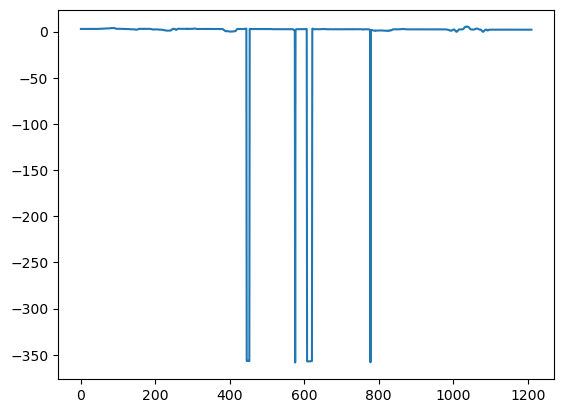

In [ ]:
x_ = []
euler_ = []
for i in range(min(line1, line3)):
    x_.append(i + 1)
    euler_.append(round(euler1[i][2] - euler3[i][2], 9))

plt.plot(x_, euler_, 1)
plt.show()

- 保存为csv

In [ ]:
with open('output/compare.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['diff', 'bj-ins-orientation', 'lidar-slam-orientation'])
    for i in range(min(line1, line3)):
        writer.writerow([round(euler1[i][2] - euler3[i][2], 9), round(euler1[i][2], 9), round(euler3[i][2], 9)])

### 1.3 北京数据+CG惯导姿态欧拉角和lidar_slam姿态欧拉角差值

In [ ]:
for i in range(min(line2, line3)):
    print("{}\t=\t{}\t-\t{}".format(round(euler2[i][2] - euler3[i][2], 9), round(euler2[i][2], 9), round(euler3[i][2], 9)))

-0.149262024	=	-0.149262024	-	0.0
-0.160845553	=	-0.163938727	-	-0.003093174
-0.206144179	=	-0.179222389	-	0.026921791
-0.183200055	=	-0.197820762	-	-0.014620707
-0.230341431	=	-0.217982151	-	0.01235928
-0.242586971	=	-0.2376277	-	0.004959271
-0.250828534	=	-0.255461675	-	-0.004633141
-0.282291013	=	-0.272069426	-	0.010221588
-0.300993944	=	-0.289443429	-	0.011550514
-0.314615852	=	-0.307020035	-	0.007595818
-0.333514687	=	-0.324592603	-	0.008922085
-0.340233869	=	-0.341345253	-	-0.001111384
-0.366553112	=	-0.358028101	-	0.008525011
-0.377202065	=	-0.37453619	-	0.002665875
-0.379470952	=	-0.390773908	-	-0.011302956
-0.403402221	=	-0.407260808	-	-0.003858587
-0.416470722	=	-0.424973709	-	-0.008502987
-0.457307866	=	-0.440158114	-	0.017149752
-0.450382603	=	-0.446130245	-	0.004252358
-0.464202156	=	-0.448439846	-	0.01576231
-0.46334856	=	-0.460227332	-	0.003121228
-0.472545131	=	-0.481023993	-	-0.008478862
-0.497155779	=	-0.499767068	-	-0.002611289
-0.524773875	=	-0.513769875	-	0.011004


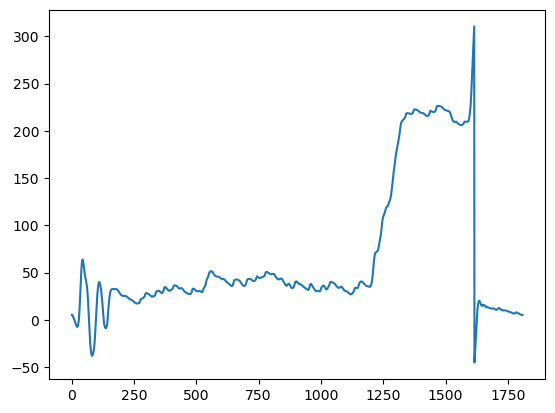

In [30]:
x_ = []
euler_ = []
for i in range(min(line4, line5)):
    x_.append(i + 1)
    euler_.append(round(euler4[i][2] - euler5[i][2], 9))

plt.plot(x_, euler_, 1)
plt.show()

### 1.4 对比两个惯导（BJ&CG）

In [ ]:
for i in range(min(line1, line2)):
    print("{}\t{}".format(round(euler1[i][2], 9), round(euler2[i][2], 9)))

2.951018497	-0.149262024
2.951768053	-0.163938727
2.952414573	-0.179222389
2.952893315	-0.197820762
2.95291762	-0.217982151
2.951646328	-0.2376277
2.95177394	-0.255461675
2.952649751	-0.272069426
2.952468884	-0.289443429
2.954088366	-0.307020035
2.954087681	-0.324592603
2.954481264	-0.341345253
2.954576986	-0.358028101
2.953490969	-0.37453619
2.952553377	-0.390773908
2.954816783	-0.407260808
2.954470621	-0.424973709
2.956314994	-0.440158114
2.957495484	-0.446130245
2.956885377	-0.448439846
2.958357516	-0.460227332
2.957776173	-0.481023993
2.958727983	-0.499767068
2.95983421	-0.513769875
2.959513977	-0.528892461
2.961953064	-0.545331827
2.960788293	-0.559707246
2.963470412	-0.575236055
2.966823201	-0.599054367
2.964454746	-0.620477262
2.96461651	-0.623889688
2.963809255	-0.643956067
2.960901541	-0.74030866
2.963298099	-0.883924421
2.962580671	-0.986833317
2.960984524	-1.059665823
2.95665554	-1.198937668
2.956476233	-1.462758224
2.95216801	-1.848195658
2.946145633	-2.277233064
2.93155212

## 3. 小车数据集（0712-52）+CG惯导

In [ ]:
for i in range(min(len(euler4), len(euler5))):
    print("{}\t{}".format(round(euler4[i][2], 9), round(euler5[i][2], 9)))

## 4. 汽车数据

In [12]:
f = open("/home/crange/dev/calib_ws/datas/calib_data_car/CGodometry_loc.txt", encoding="utf-8")
line1 = 0

data_line = f.readline()
datas1 = []
while data_line:
    d = data_line.replace('\n', '').split()
    datas1.append(d)
    data_line = f.readline()
    # print(data_line)
    line1 += 1

euler1 = []
for i in range(line1):
    temp_q = [float(datas1[i][4]), float(datas1[i][5]), float(datas1[i][6]), float(datas1[i][7])]
    r = R.from_quat(temp_q)
    temp_euler = r.as_euler('xyz', degrees=True)
    euler1.append(temp_euler)

f = open("/home/crange/dev/calib_ws/datas/calib_data_car/lidar_slam_pose.txt", encoding="utf-8")
line2 = 0

data_line = f.readline()
datas2 = []
while data_line:
    d = data_line.replace('\n', '').split()
    datas2.append(d)
    data_line = f.readline()
    # print(data_line)
    line2 += 1

euler2 = []
for i in range(line2):
    temp_q = [float(datas2[i][4]), float(datas2[i][5]), float(datas2[i][6]), float(datas2[i][7])]
    r = R.from_quat(temp_q)
    temp_euler = r.as_euler('xyz', degrees=True)
    euler2.append(temp_euler)

In [13]:
bag = rosbag.Bag('/home/crange/dev/calib_ws/datas/calib_data_car/car.bag')
ins = []
imu = []
for topic, msg, t in bag.read_messages():
    if topic == "/novatel/oem7/inspva":
        ins.append(msg)

### 插值

In [16]:
e = []
for i in range(len(ins)):
    e.append([ins[i].roll, ins[i].pitch, ins[i].azimuth])
euler = np.array(e)

x = np.linspace(0, 1, len(euler))
f = interp1d(x, euler, axis=0)

new_x = np.linspace(0, 1, len(euler1))
euler3 = f(new_x)

In [17]:
euler

array([[  0.19605654,   0.31739995, 146.32143085],
       [  0.1951761 ,   0.3189288 , 146.32089423],
       [  0.19520835,   0.31985518, 146.31992349],
       ...,
       [  0.17385134,  -0.30852662,  47.8344521 ],
       [  0.17457611,  -0.3080912 ,  47.83432433],
       [  0.17514485,  -0.30837366,  47.83441389]])

In [6]:
for i in range(len(euler1)):
    print("{:.{}f}\t{:.{}f}\t{:.{}f}".format(euler1[i][2], 9,  # MATLAB     -> Orientation
                                             euler2[i][2], 9,  # lidar_slam -> Orientation
                                             euler3[i][2], 9)) # 北云        -> Orientation

0.011741812	0.000000000	146.321430851
0.142468933	0.000950079	146.318880075
0.570166870	0.006242600	146.321115781
1.380123713	0.020632422	146.317911427
2.608597805	0.034724633	146.312096014
4.785327781	0.047419331	146.304441955
7.915634893	0.072220769	146.294780506
11.915573160	0.116346598	146.279874025
17.124254092	0.182514728	146.249213540
22.808334454	0.286798103	146.194492954
29.201981873	0.421940299	146.107719418
35.148652832	0.595316737	145.987087435
40.933931150	0.804907963	145.834287606
45.531507274	1.063500203	145.636058652
49.052898297	1.369813301	145.400064202
51.857990084	1.712265055	145.117281358
53.769814424	2.085591574	144.791020456
54.993822505	2.510550290	144.428704637
55.896244386	2.993065420	144.021519890
56.413089275	3.503546324	143.563792143
56.698752049	4.066498268	143.067919562
56.662473102	4.653149860	142.527107010
56.384740386	5.270601023	141.948388472
56.024796957	5.933605540	141.348749832
55.557167166	6.642021340	140.707250928
55.035191952	7.380260878	140.015

In [66]:
x = []
y1 = []
for i in range(len(euler1)):
    x.append(i+1)
    y1.append(euler1[i][2])
y2 = []
for i in range(len(euler1)):
    y2.append(euler2[i][2] % 360)
y3 = []
for i in range(len(euler1)):
    y3.append(euler3[i][2])
y3_ = []
for i in range(len(euler1)):
    y3_.append(y3[i] - y3[0])

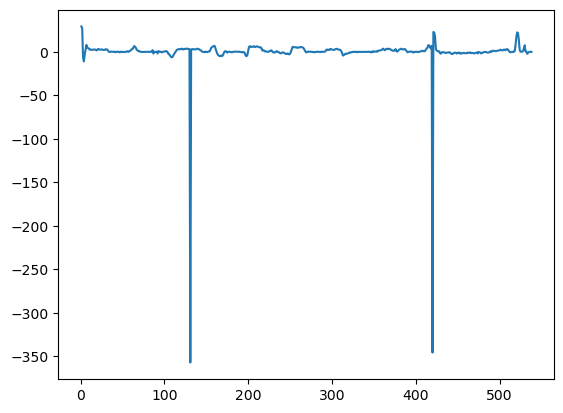

In [67]:
t = []
i = 0
tx = []
index = 1
while i < (len(euler1) - 10):
    tx.append(index)
    t.append(y1[i+10] - y1[i])
    i += 10
    index += 1
plt.plot(tx, t, 1)
plt.show()

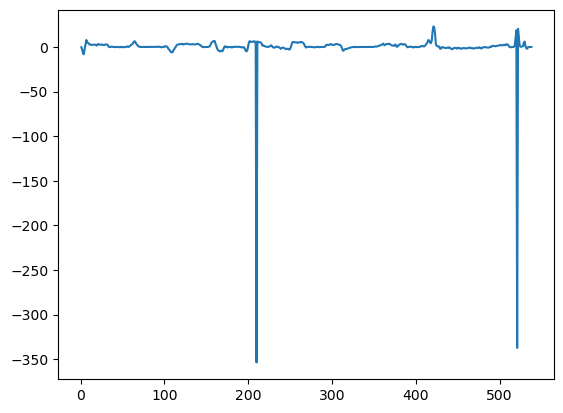

In [65]:
t = []
i = 0
tx = []
index = 1
while i < (len(euler1) - 10):
    tx.append(index)
    t.append(y3[i+10] - y3[i])
    i += 10
    index += 1
plt.plot(tx, t, 1)
plt.show()

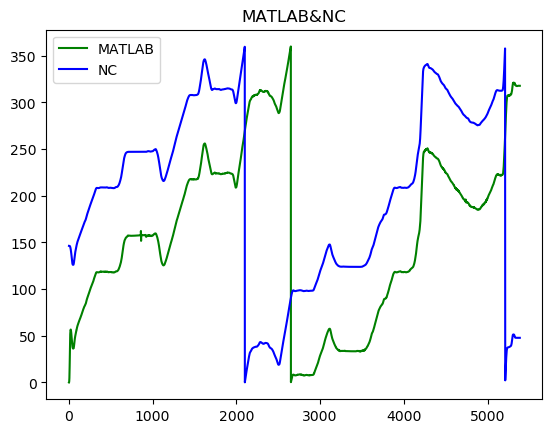

In [58]:
plt.title("MATLAB&NC")
plt.plot(x, y1, 1, color='green',label='MATLAB')
# plt.plot(x, y2, 1, label='lidar_slam')
plt.plot(x, y3, 1, color='blue', label='NC')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

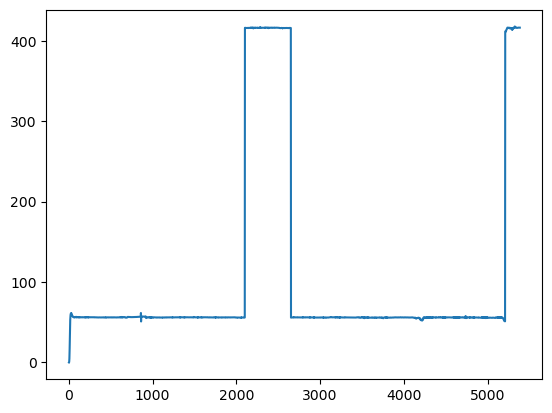

In [49]:
y_ = []
for i in range(len(euler1)):
    y_.append(y1[i] - y3_[i])

# plt.plot(x, y2, 1, label='lidar_slam')
plt.plot(x, y_, 1)
plt.show()

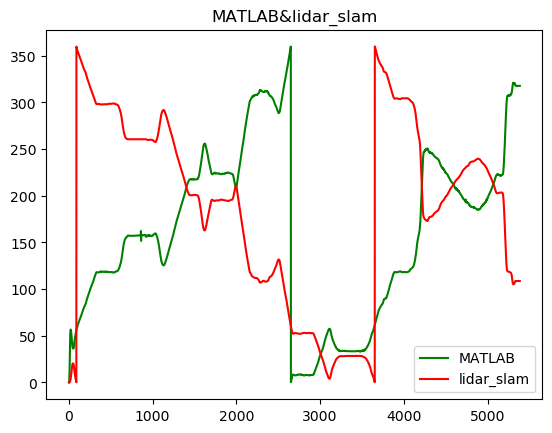

In [57]:
plt.title("MATLAB&lidar_slam")
plt.plot(x, y1, 1, color='green',label='MATLAB')
plt.plot(x, y2, 1, color='red', label='lidar_slam')
# plt.plot(x, y3, 1, color='blue', label='NC')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

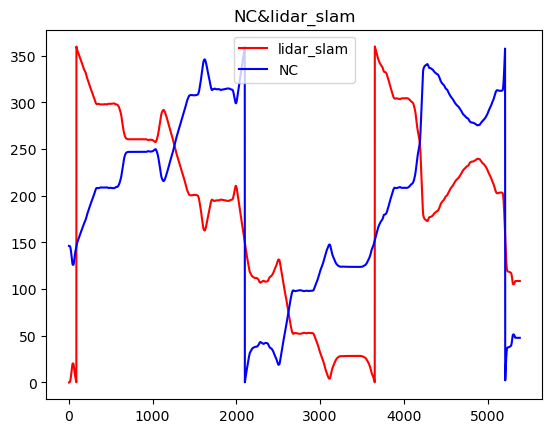

In [56]:
plt.title("NC&lidar_slam")
# plt.plot(x, y1, 1, color='green',label='MATLAB')
plt.plot(x, y2, 1, color='red', label='lidar_slam')
plt.plot(x, y3, 1, color='blue', label='NC')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

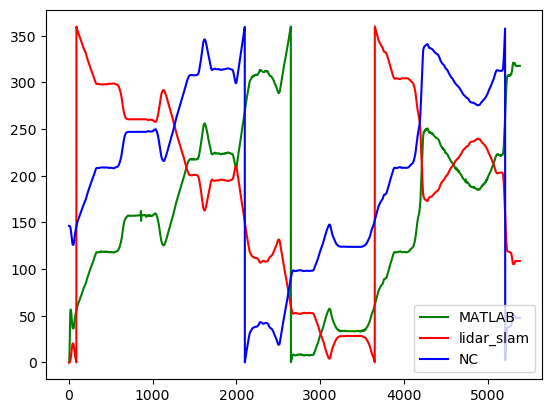

In [55]:
plt.plot(x, y1, 1, color='green',label='MATLAB')
plt.plot(x, y2, 1, color='red', label='lidar_slam')
plt.plot(x, y3, 1, color='blue', label='NC')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()